# Procesamiento de Imágenes - Trabajo Práctico N°4
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

# Ejercicio 4

## Histograma

El histograma es una representación gráfica que condensa una serie de datos en una forma fácil de interpretar, tomando los distintos puntos y agrupándolos en rangos lógicos o intervalos. De esta manera, cada rango, o "bin", indica la frecuencia -absoluta o relativa- con la que se presentan los valores de dicho rango en la serie de datos completa. En cuanto a imágenes, un histograma representa una aproximación discreta de una función de densidad de probabilidad basada en las ocurrencias reales de los valores de los píxeles cuantificados. Puede proporcionar información importante sobre la distribución de las amplitudes de las muestras dentro de la imagen, sobre el rango dinámico de la señal, y sobre si la imagen está subexpuesta o sobreexpuesta. En una imagen en blanco y negro, por ejemplo, cada barra del histograma indicará la frecuencia con la se presenta el rango correspondiente de grises en la imagen.

Por otro lado, el usuario o analista puede personarlizalos de acuerdo a distintos parámetros. El primero de ellos es la cantidad de rangos, o "bins", entre los que dividir el conjunto de datos. A su vez, puede ser de utilidad seleccionar un rango intermedio de datos y no tener en cuenta al conjunto completo. Asimismo, es posible seleccionar si se desea que el histograma se encuentre normalizado, es decir que las frecuencias correspondan a frecuencias relativas, o no. En el caso negativo (no normalizado) las frecuencias obtenidas serán frecuencias absolutas.


## Implementación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def histogram(data, n_bins=10, data_range=None, normed=False):
    """
    The function calculates the histogram of an input array of values.
    
    Parameters
    ----------
        'data':             array_like - The values to obtain the histogram from.
        'n_bins':           int - The number of bins of the resulting histogram.
        'data_range':       tuple or None - The limits of the histogram.
        'normed':           bool - Normalizes the resulting histogram. 
                                    If False, the values represent relative frequencies (from 0 to 1). 
                                    If True, the values represent absolute frequencies.
    ----------
        'x_values':             array_like - The left edges of the bins.
        'bins_y_values':        array_like - The values of the histogram bins.
        'bin_width':            float - The width of the bins.
    """
    data_in = np.array(data).flatten()
    data_range = data_range
    if data_range is None:
        data_range = (data_in.min(), data_in.max())

    bin_width = (data_range[1]-data_range[0])/n_bins
    x_values = np.linspace(data_range[0], data_range[1], n_bins)
    bins_y_values = []
    for x_val in x_values:
        bin_limits = (x_val, x_val+bin_width)
        bin_y = np.array(
            [np.bitwise_and(bin_limits[0] <= data, data < bin_limits[1])]).sum()
        bins_y_values.append(bin_y)

    if normed:
        norm = np.linalg.norm(bins_y_values)
        bins_y_values = np.array(bins_y_values)/norm
        bins_y_values = np.asarray(bins_y_values)

    return x_values, bins_y_values, bin_width

def plot_hist(x_values, y_values, bin_width):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(x_values, y_values, width=bin_width, edgecolor = "black", align='edge')
    plt.title("Histogram")



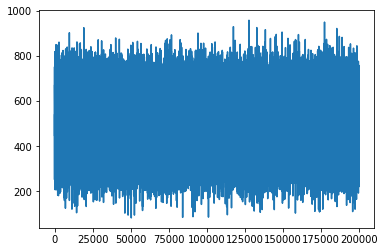

In [2]:

data = np.random.normal(500, 100, 200000)
plt.plot(data)


## Test
### Normalizado

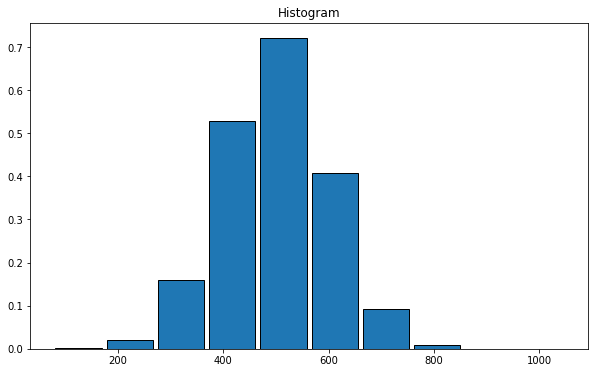

In [3]:
x, y, bin_width = histogram(data, normed=True)
plot_hist(x, y, bin_width)

### No normalizado

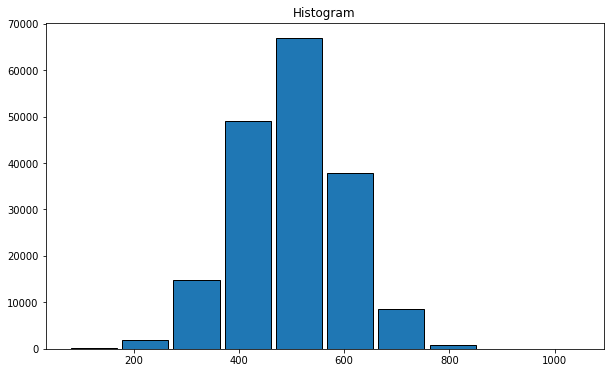

In [4]:
x, y, bin_width = histogram(data, normed=False)
plot_hist(x, y, bin_width)

### Número de bins

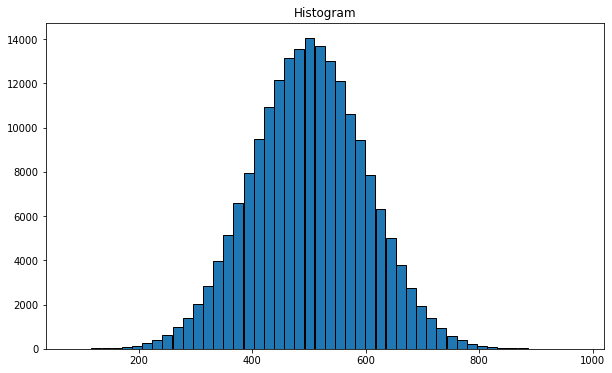

In [5]:
x, y, bin_width = histogram(data, n_bins=50)
plot_hist(x, y, bin_width)

### Rango especificado

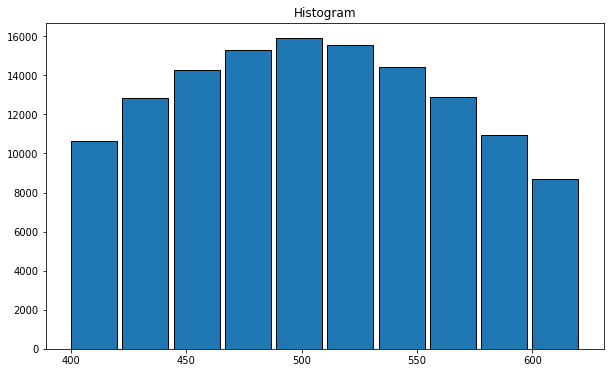

In [6]:
x, y, bin_width = histogram(data, data_range=(400,600))
plot_hist(x, y, bin_width)

### Imagen

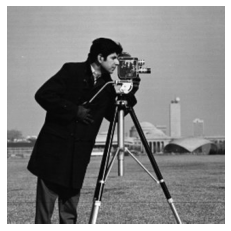

In [7]:
from PIL import Image
cameraman = np.array(Image.open('../../assets/ej4/cameraman.png'))
plt.axis('off')
plt.imshow(cameraman, cmap='gray')
plt.show()

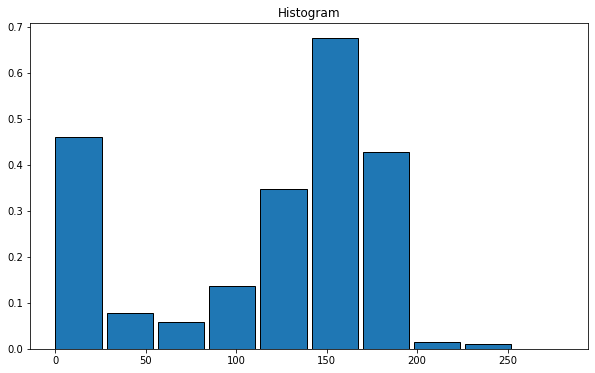

In [8]:
x, y, bin_width = histogram(cameraman, normed=True)
plot_hist(x, y, bin_width)